In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [14]:
loss = pd.read_csv('./JetStreamAnalyticVoyager510/loss.dat', delimiter=' ', header=None)

steps = loss.iloc[:, 0]

loss1 = loss[1]
loss2 = loss[2]
loss3 = loss[3]
loss4 = loss[4]
loss5 = loss[5]
loss6 = loss[6]
loss7 = loss[7]
loss8 = loss[8]
loss9 = loss[9]
loss10 = loss[10]

training_losses = loss.iloc[:, 1:11]
test_losses = loss.iloc[:, 11:]

In [15]:
plt.rcParams['axes.labelsize'] = 20   # Increase the size of labels
plt.rcParams['axes.titlesize'] = 20   # Increase the size of titles
plt.rcParams['xtick.labelsize'] = 10  # Increase the size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 10  # Increase the size of y-axis tick labels

/var/folders/t3/9mj_24gd1w97bqts_sw0yhbw0000gn/T/ipykernel_23375/3015860254.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for line in legend.legendHandles:


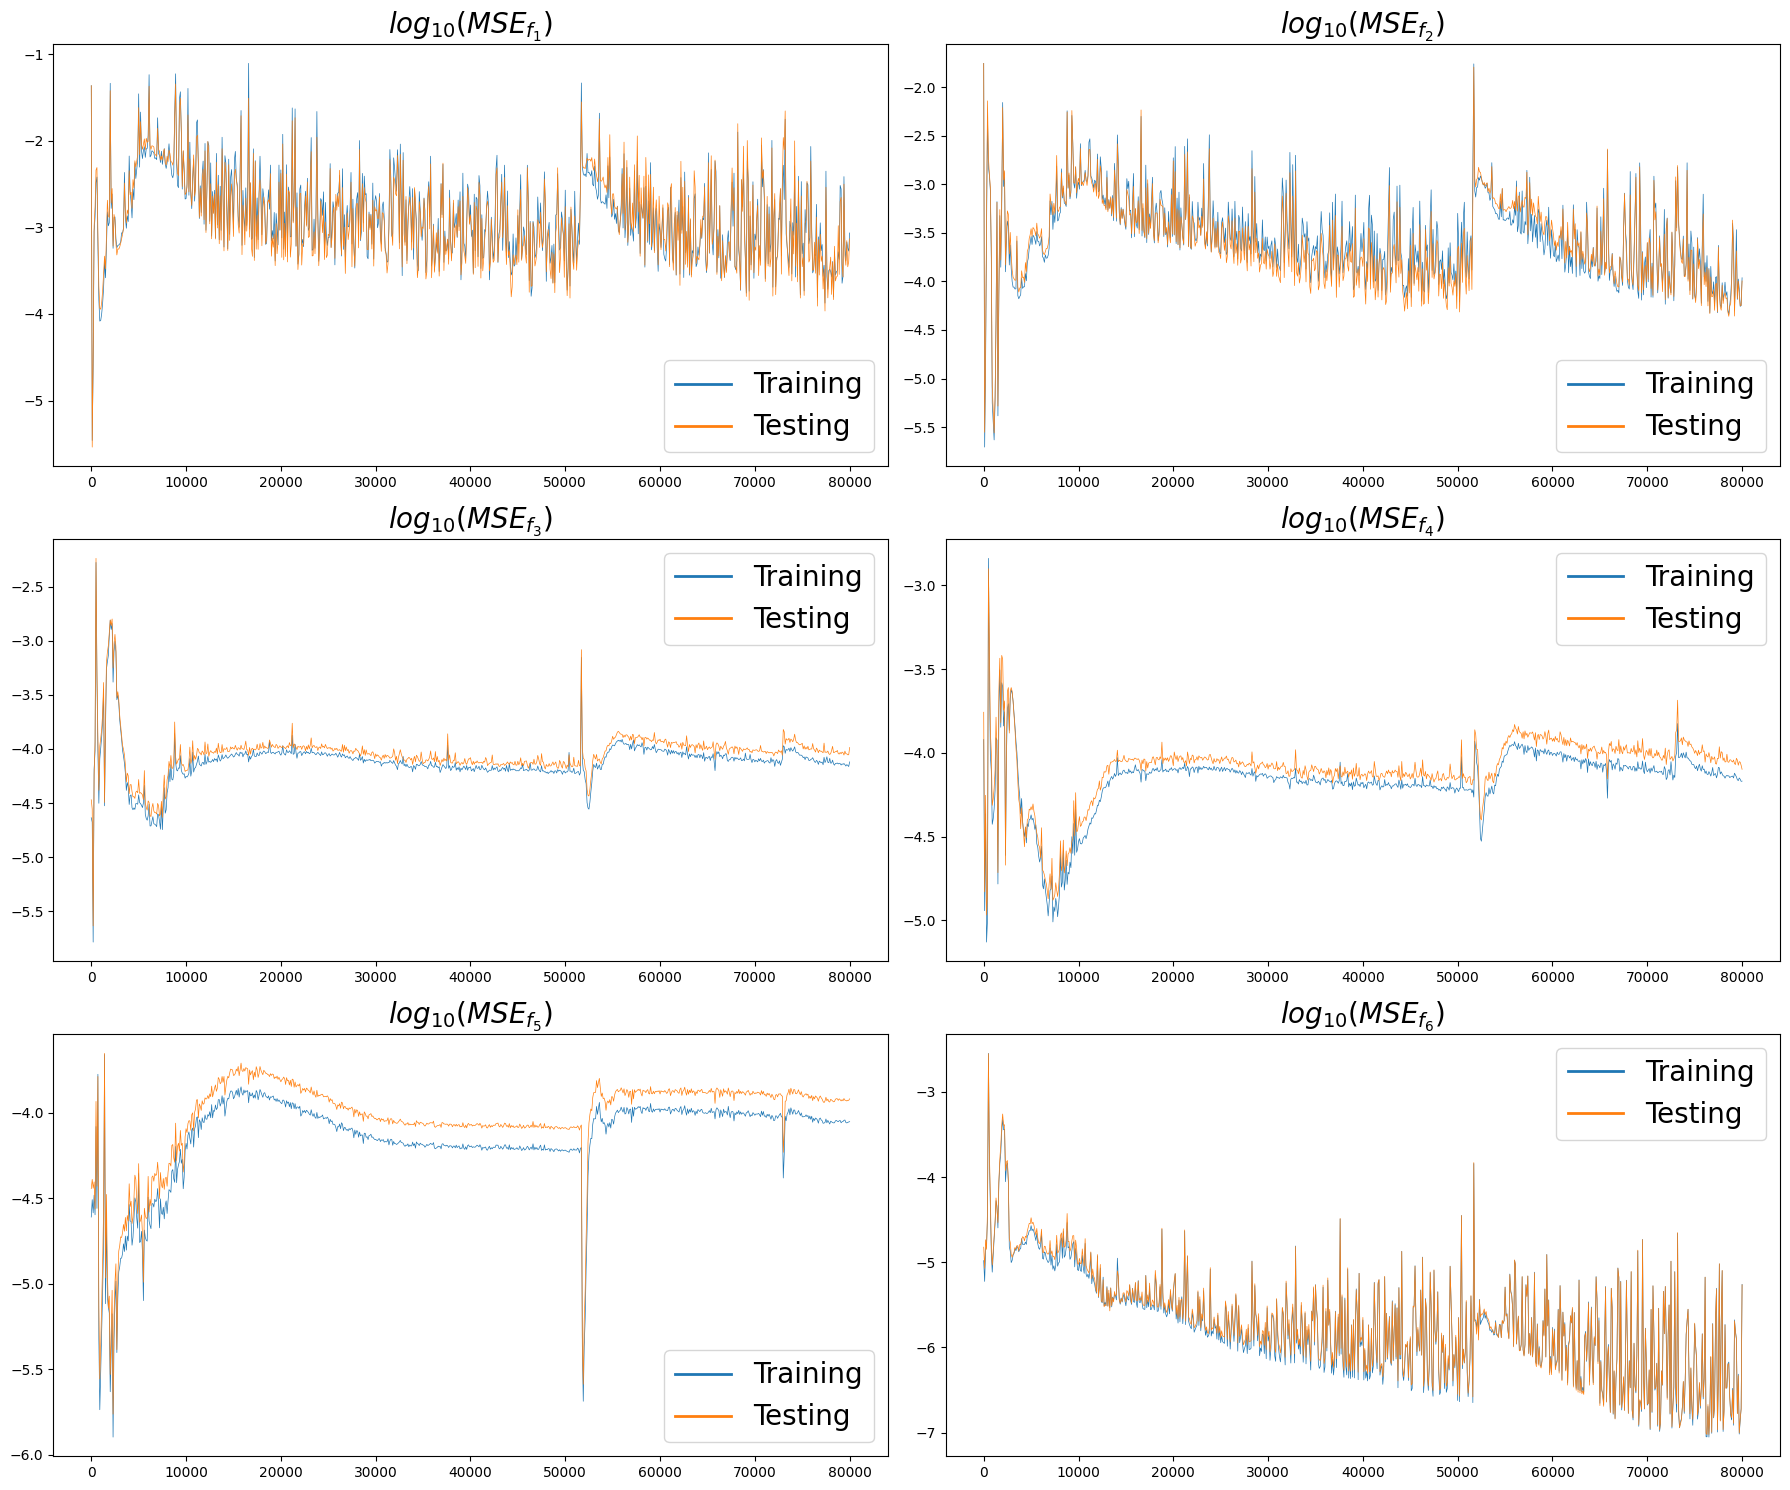

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(18, 15))

linewidth = 0.5

labels = ["$log_{10}(MSE_{f_1})$", 
          "$log_{10}(MSE_{f_2})$",
          "$log_{10}(MSE_{f_3})$",
          "$log_{10}(MSE_{f_4})$",
          "$log_{10}(MSE_{f_5})$",
          "$log_{10}(MSE_{f_6})$"]

for i in range(6):
    axs_index = int(i/2), i%2
    axs[axs_index].plot(steps, np.log10(loss[training_losses.columns[i]]), linewidth=linewidth, label='Training')
    axs[axs_index].plot(steps, np.log10(loss[test_losses.columns[i]]), linewidth=linewidth, label='Testing')
    axs[axs_index].set_title(labels[i])
    legend = axs[axs_index].legend(fontsize=20)
    for line in legend.legendHandles:
      line.set_linewidth(2)  # Adjust this value to make lines thicker or thinner

# loss_weights = [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
# axs_index = -1, -1
# axs[axs_index].plot(steps, np.log10(np.dot(training_losses, loss_weights)), linewidth=linewidth, label='Training')
# axs[axs_index].plot(steps, np.log10(np.dot(test_losses, loss_weights)), linewidth=linewidth, label='Testing')
# axs[axs_index].set_title('$log_{10}(MSE)$')
# axs[axs_index].legend()
plt.tight_layout()
plt.savefig('physics_losses_hybrid.png', dpi=600)
plt.show()

/var/folders/t3/9mj_24gd1w97bqts_sw0yhbw0000gn/T/ipykernel_23375/2287170776.py:15: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for line in legend.legendHandles:


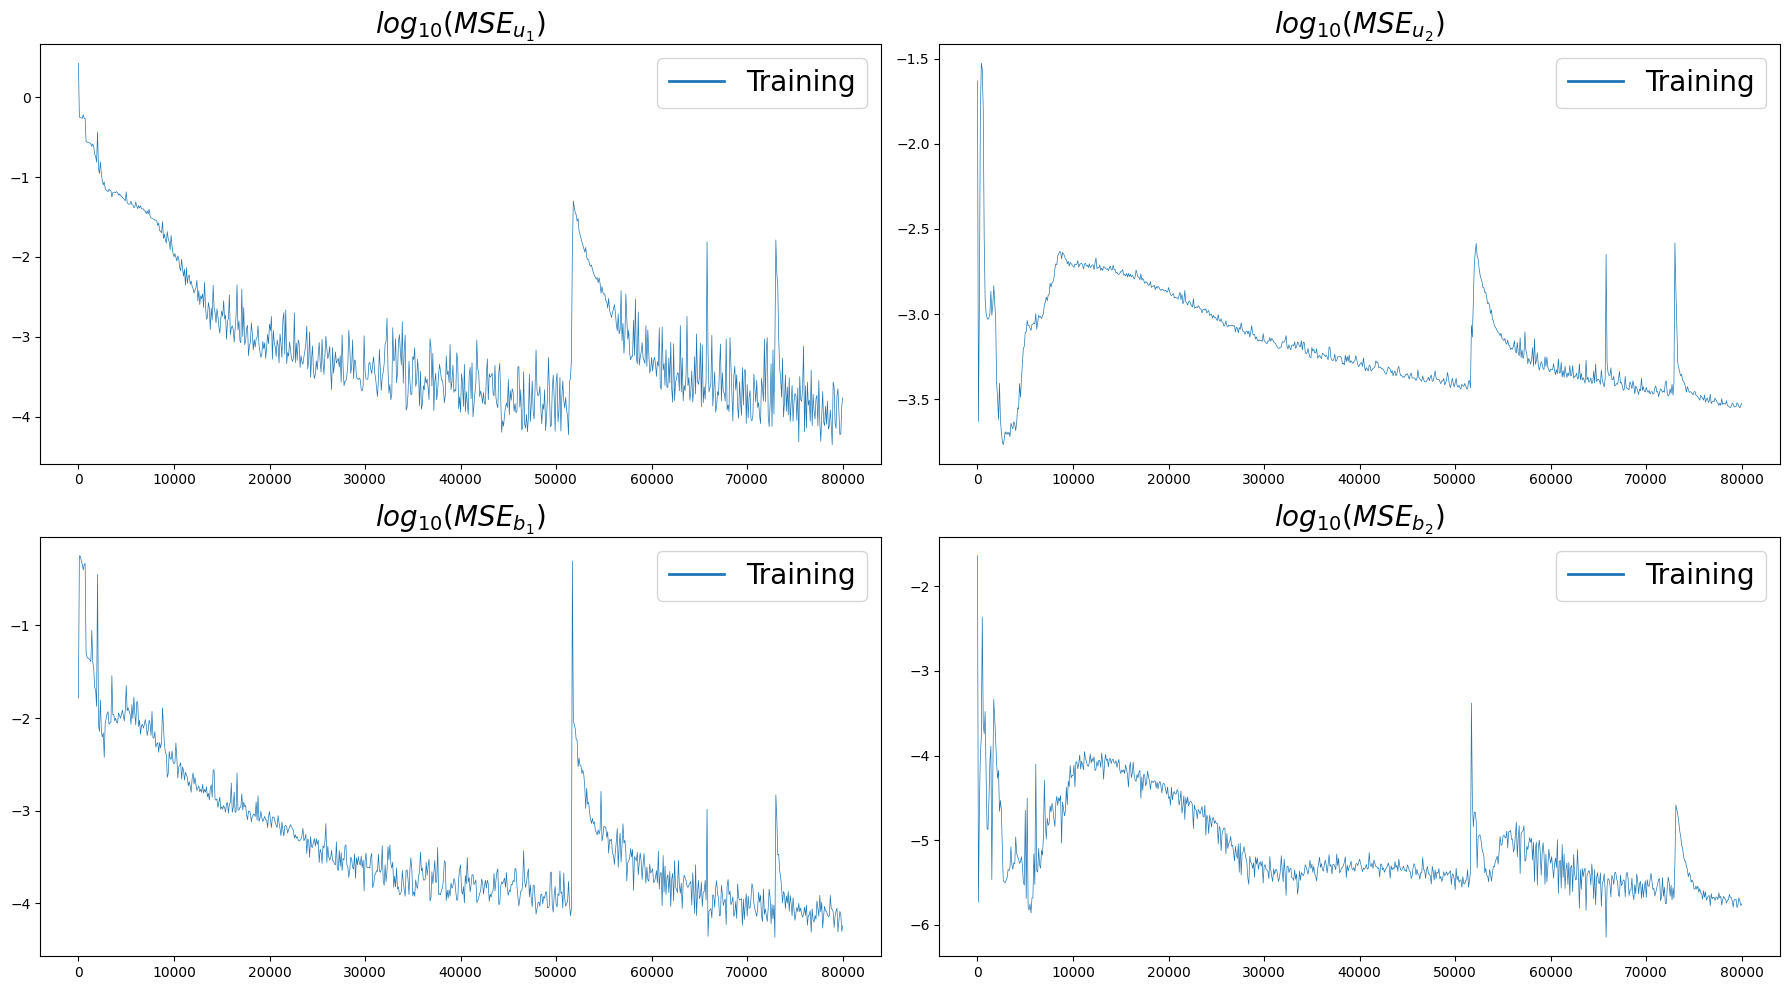

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

linewidth = 0.5

labels = ["$log_{10}(MSE_{u_1})$",
          "$log_{10}(MSE_{u_2})$",
          "$log_{10}(MSE_{b_1})$",
          "$log_{10}(MSE_{b_2})$"]

for i in range(6, 10):
    axs_index = int((i-6)/2), (i-6)%2
    axs[axs_index].plot(steps, np.log10(loss[training_losses.columns[i]]), linewidth=linewidth, label='Training')
    axs[axs_index].set_title(labels[i-6])
    legend = axs[axs_index].legend(fontsize=20)
    for line in legend.legendHandles:
      line.set_linewidth(2)  # Adjust this value to make lines thicker or thinner

plt.tight_layout()
plt.savefig('bc_losses_hybrid.png', dpi=600)
plt.show()

/var/folders/t3/9mj_24gd1w97bqts_sw0yhbw0000gn/T/ipykernel_23375/656079021.py:7: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for line in legend.legendHandles:


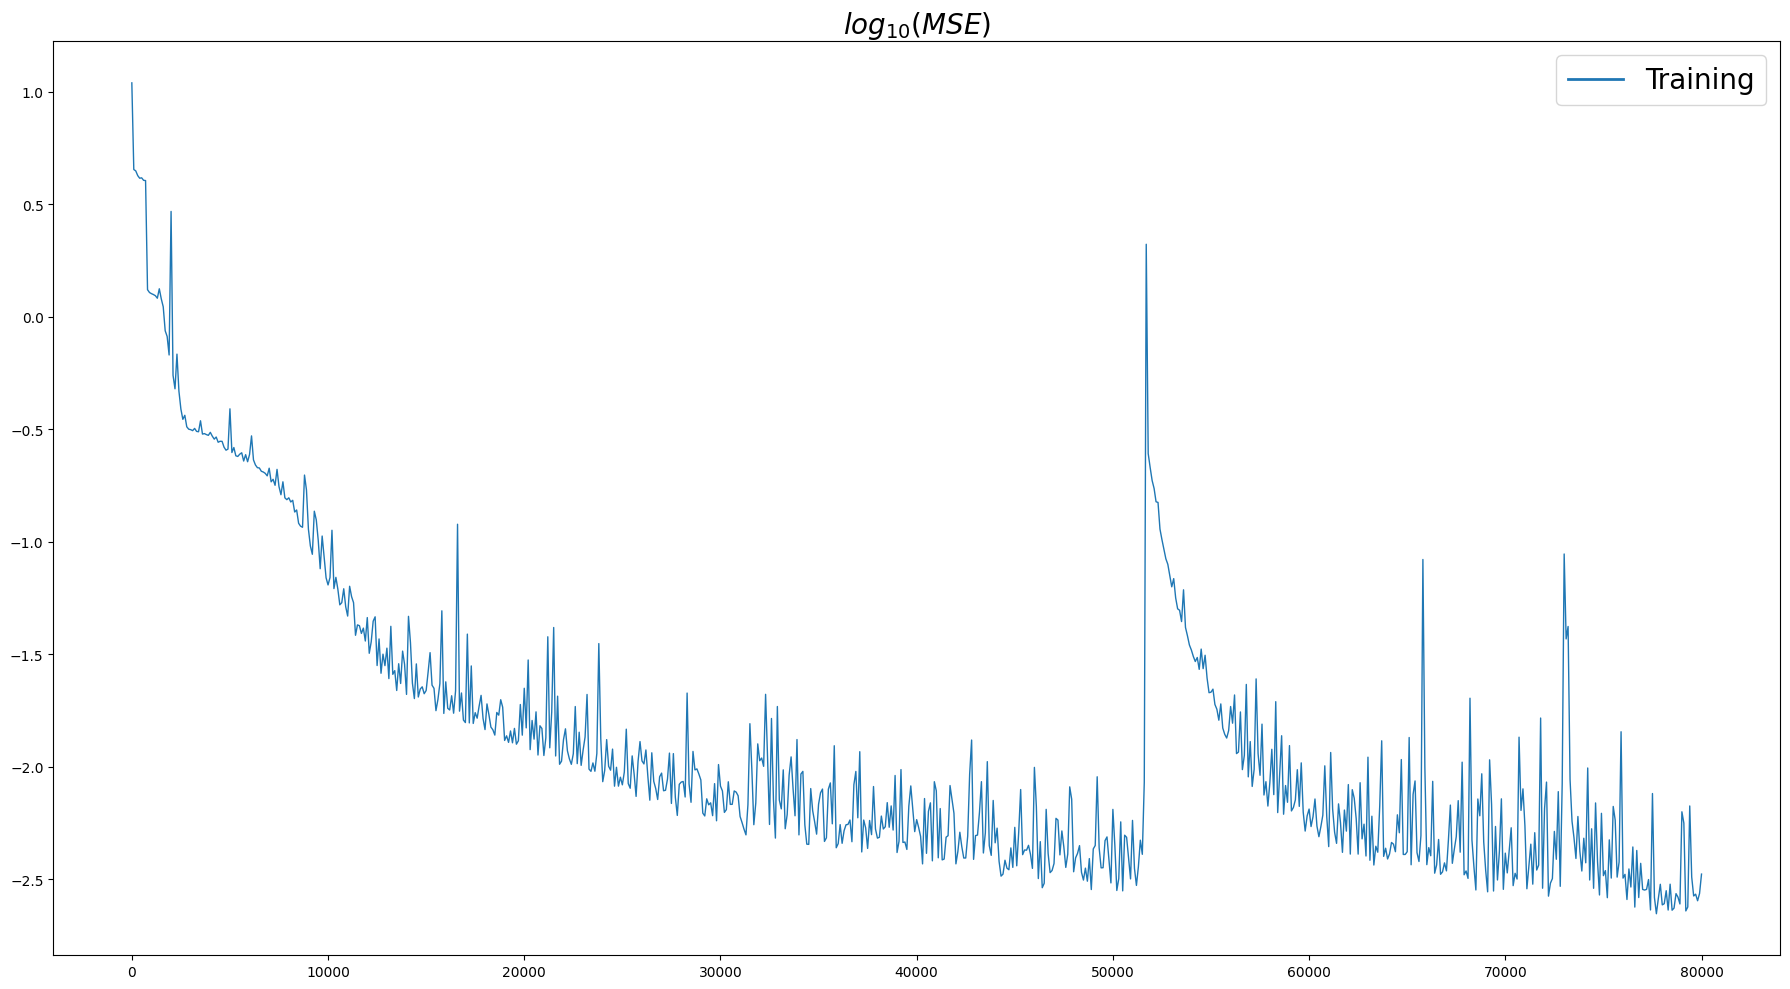

In [16]:
fig, ax = plt.subplots(figsize=(18, 10))

loss_weights = [1, 1, 1, 1, 1, 1, 4, 4, 4, 4]
ax.plot(steps, np.log10(np.dot(training_losses, loss_weights)), linewidth=1, label='Training')
ax.set_title('$log_{10}(MSE)$')
legend = ax.legend(fontsize=20)
for line in legend.legendHandles:
  line.set_linewidth(2)  # Adjust this value to make lines thicker or thinner
plt.tight_layout()
plt.savefig('total_loss_hybrid.png', dpi=600)
plt.show()